In [1]:
!pip install -q gym matplotlib

In [12]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [1]:
import gym #para el juego
import random #para generar números aleatorios
import numpy as np #para hacer algunos cálculos

In [2]:
# Inicializar el entorno no resbaladizo de Frozen Lake
environment = gym.make("FrozenLake-v1",render_mode="ansi", is_slippery=False)
environment.reset()
environment.render()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


['\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']

In [3]:
# Inicializar Q-table con ceros
# Nuestra "table" tiene las siguientes dimensiones:
# (filas x columnas) = (estados x acciones) = (16 x 4)
qtable = np.zeros((16, 4))

# Alternativamente, la biblioteca "gym" también puede directamente darnos el número de estados y acciones usando
# "env.observation_space.n" y "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

# Veamos cómo se ve
print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
random.choice(["LEFT", "DOWN", "RIGHT", "UP"])

'LEFT'

In [5]:
environment.action_space.sample()

0

In [6]:
environment.step(2)
environment.render()

['  (Right)\nS\x1bF\x1bFF\nFHFH\nFFFH\nHFFG\n']

In [7]:
# 1. Elegir aleatoriamente una acción utilizando action_space.sample()
action = environment.action_space.sample()

# 2. Implementar esta acción y mover el agente en la dirección deseada
new_state, reward, done, info = environment.step(action)

# Mostramos los resultados (recompensa y mapa)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.59049 0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.6561  0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.729   0.     ]
 [0.      0.      0.81    0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


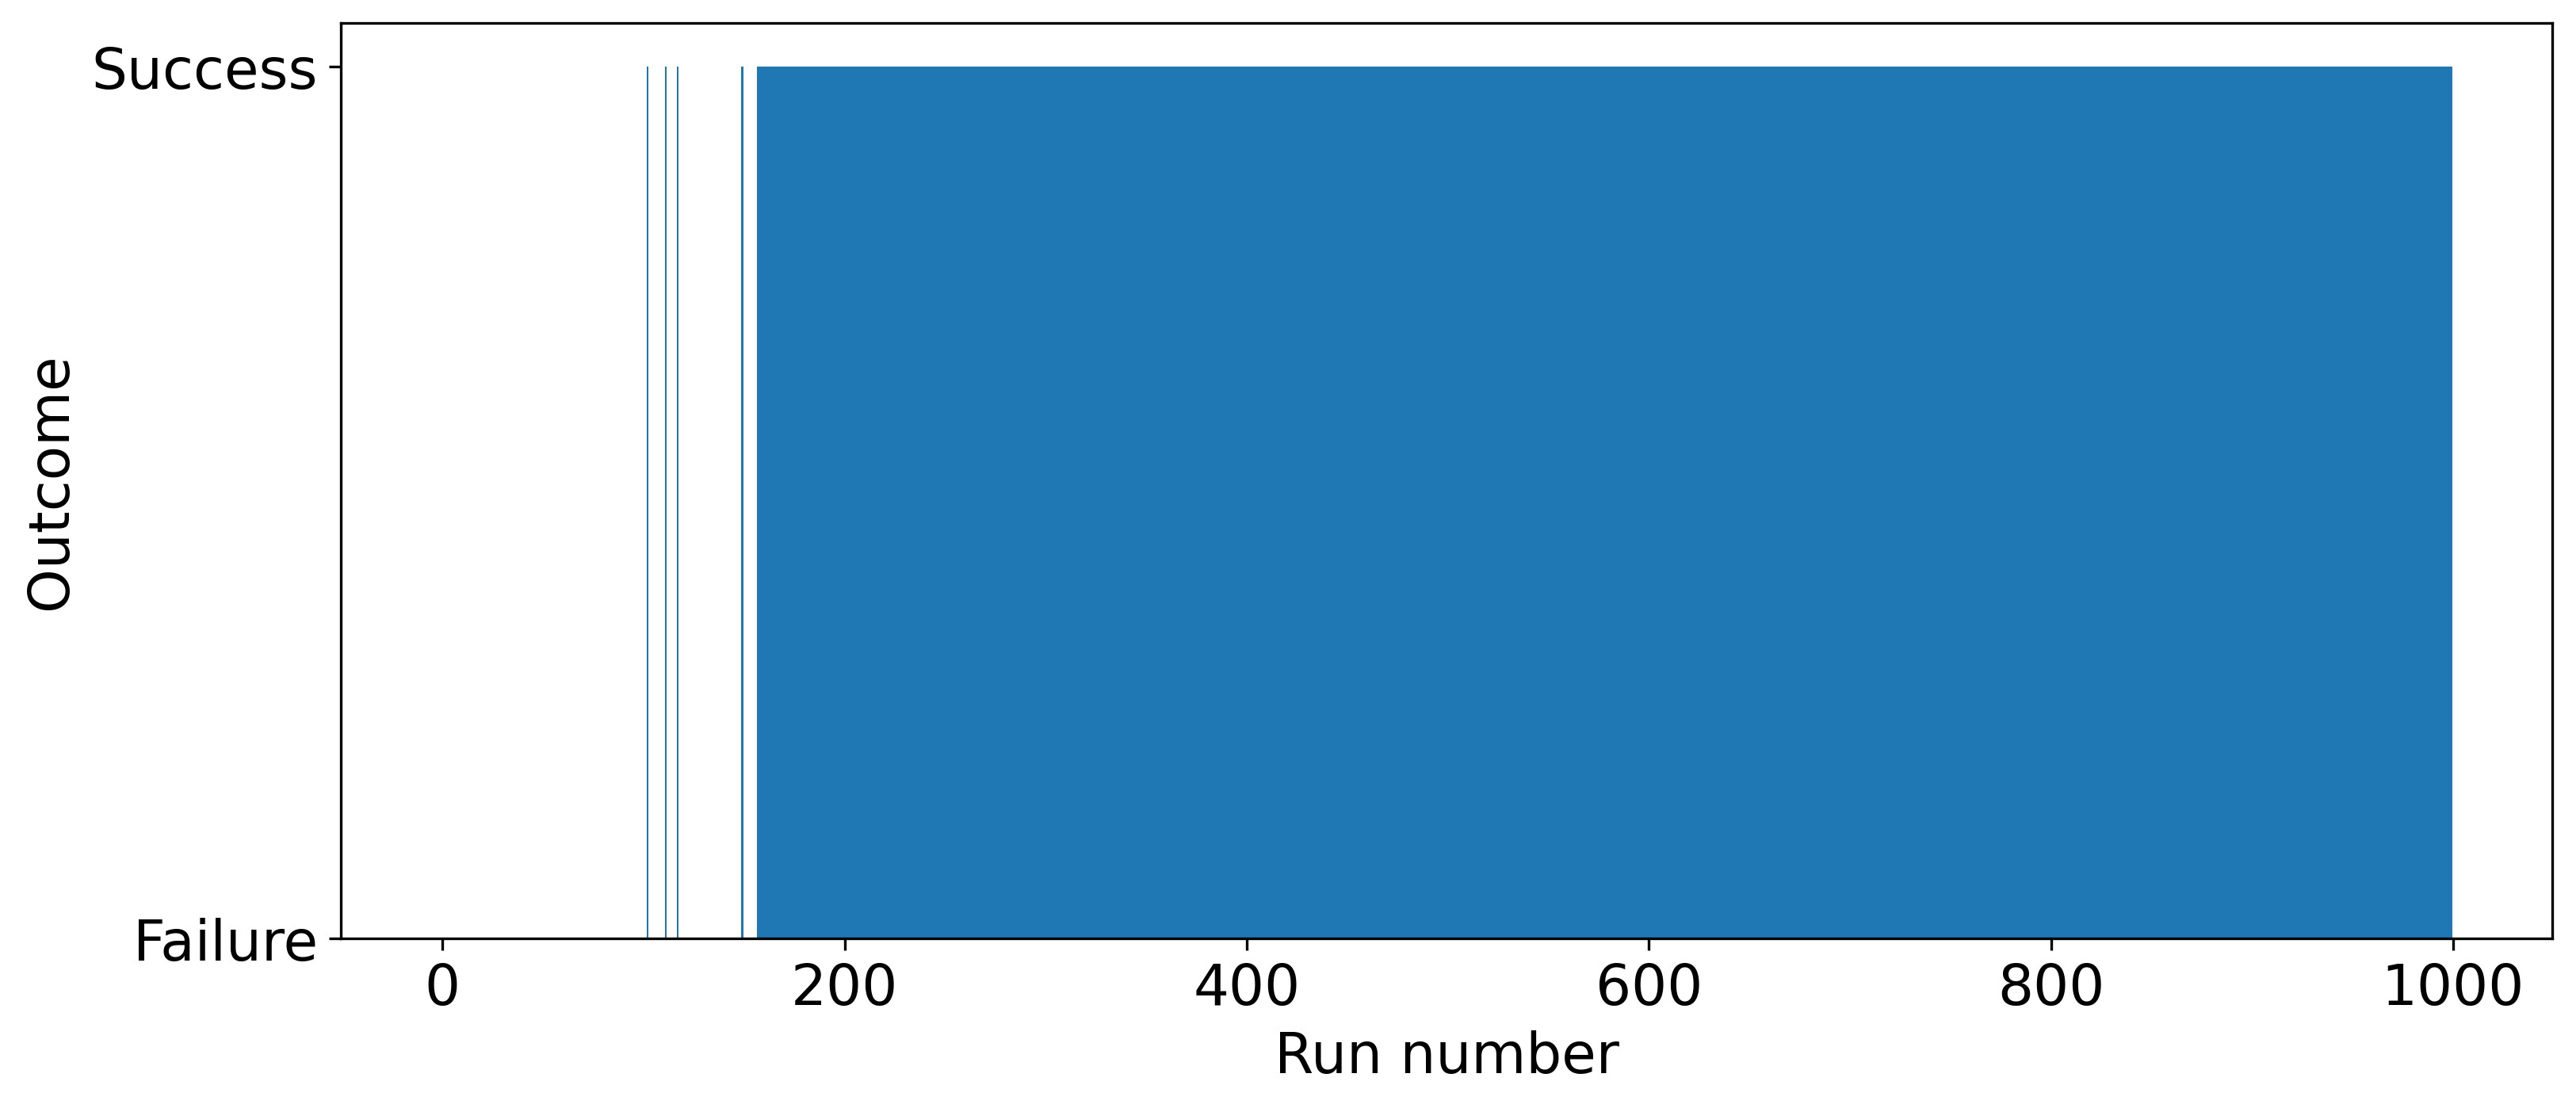

In [8]:
# Importar matplotlib para trazar los resultados
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Número total de episodios
alpha = 0.5            # Tasa de aprendizaje
gamma = 0.9            # Factor de descuento

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un hoyo o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # Si no hay una mejor acción (solo ceros), elige una al azar
        else:
          action = environment.action_space.sample()

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s, a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [9]:
episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # Si no hay una mejor acción (solo ceros), elegimos una al azar
        else:
          action = environment.action_space.sample()

        # Implementamos esta acción y movemos el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


In [10]:
from IPython.display import clear_output
import time

state = environment.reset()
done = False
sequence = []

while not done:
    # Elija la acción con el valor más alto en el estado actual
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # Si no hay una mejor acción (solo ceros), elige una al azar
    else:
      action = environment.action_space.sample()

    # Añade la acción a la secuencia.
    sequence.append(action)

    # Implementamos esta acción y movemos el agente en la dirección deseada.
    new_state, reward, done, info = environment.step(action)

    # Actualizar nuestro estado actual
    state = new_state

    # Actualizar el renderizado
    clear_output(wait=True)
    environment.render()
    time.sleep(1)

print(f"Sequence = {sequence}")

Sequence = [1, 1, 2, 2, 1, 2]


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.531441   0.59049    0.59049    0.531441  ]
 [0.53144092 0.         0.6561     0.59048999]
 [0.59048992 0.729      0.59048993 0.65609996]
 [0.65609999 0.         0.58709739 0.58807472]
 [0.59049    0.6561     0.         0.531441  ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.         0.65609974]
 [0.         0.         0.         0.        ]
 [0.6561     0.         0.729      0.59049   ]
 [0.6561     0.81       0.81       0.        ]
 [0.72899983 0.9        0.         0.72899981]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.81       0.9        0.729     ]
 [0.81       0.9        1.         0.81      ]
 [0.

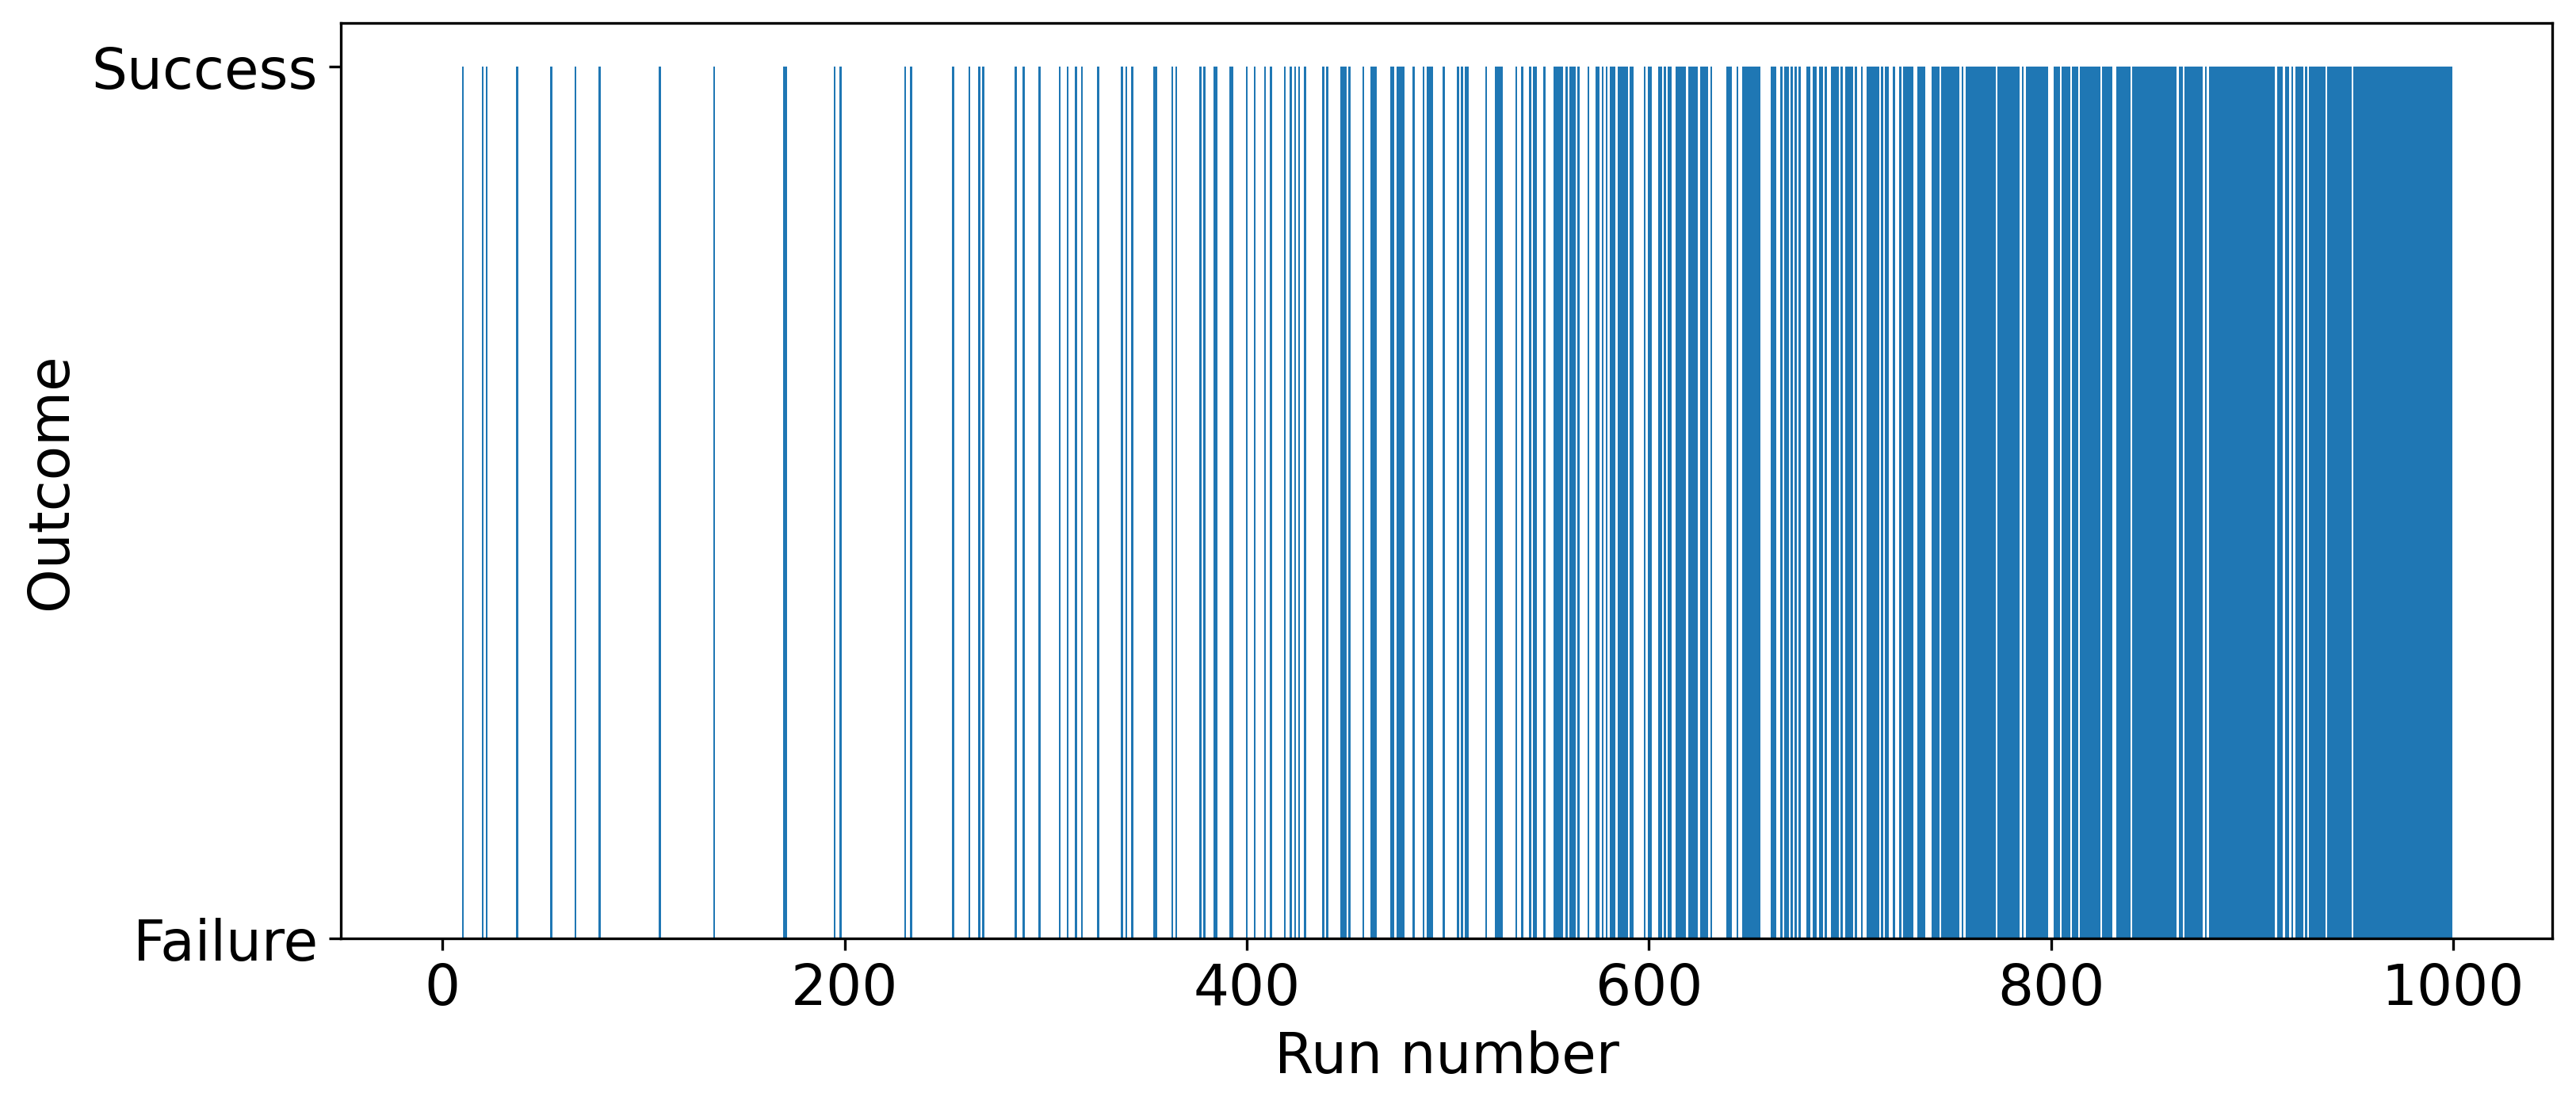

In [11]:
# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Número total de episodios
alpha = 0.5            # Tasa de aprendizaje
gamma = 0.9            # Factor de descuento
epsilon = 1.0          # Cantidad de aleatoriedad en la selección de acciones.
epsilon_decay = 0.001  # Cantidad fija a disminuir

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Entrenamiento
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        # Genera un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < épsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment.action_space.sample()
        # De lo contrario, realice la acción con el valor más alto en el estado actual.
        else:
          action = np.argmax(qtable[state])

        # Implementamos esta acción y movemos el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizamos Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

    # Actualizar épsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

In [14]:
episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[2.95800330e-02 2.99296640e-02 3.37671630e-02 2.96545816e-02]
 [1.07858905e-02 1.66259644e-02 7.93238216e-03 2.58739248e-02]
 [2.11080085e-02 2.52039937e-02 1.79160633e-02 2.04903031e-02]
 [1.62222261e-02 1.68924087e-02 1.84896872e-02 2.60575142e-02]
 [5.92181315e-02 7.80453872e-03 2.71282074e-02 2.41839783e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.21906323e-02 4.46610360e-03 6.30281507e-03 1.26557169e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.99486392e-02 3.24130719e-02 5.29528898e-02 7.51750130e-02]
 [1.24667705e-01 2.55824324e-01 8.17242230e-02 1.21519913e-01]
 [4.88861971e-01 4.43268974e-02 6.30165234e-02 6.52352940e-02]
 [0.00000000e+00

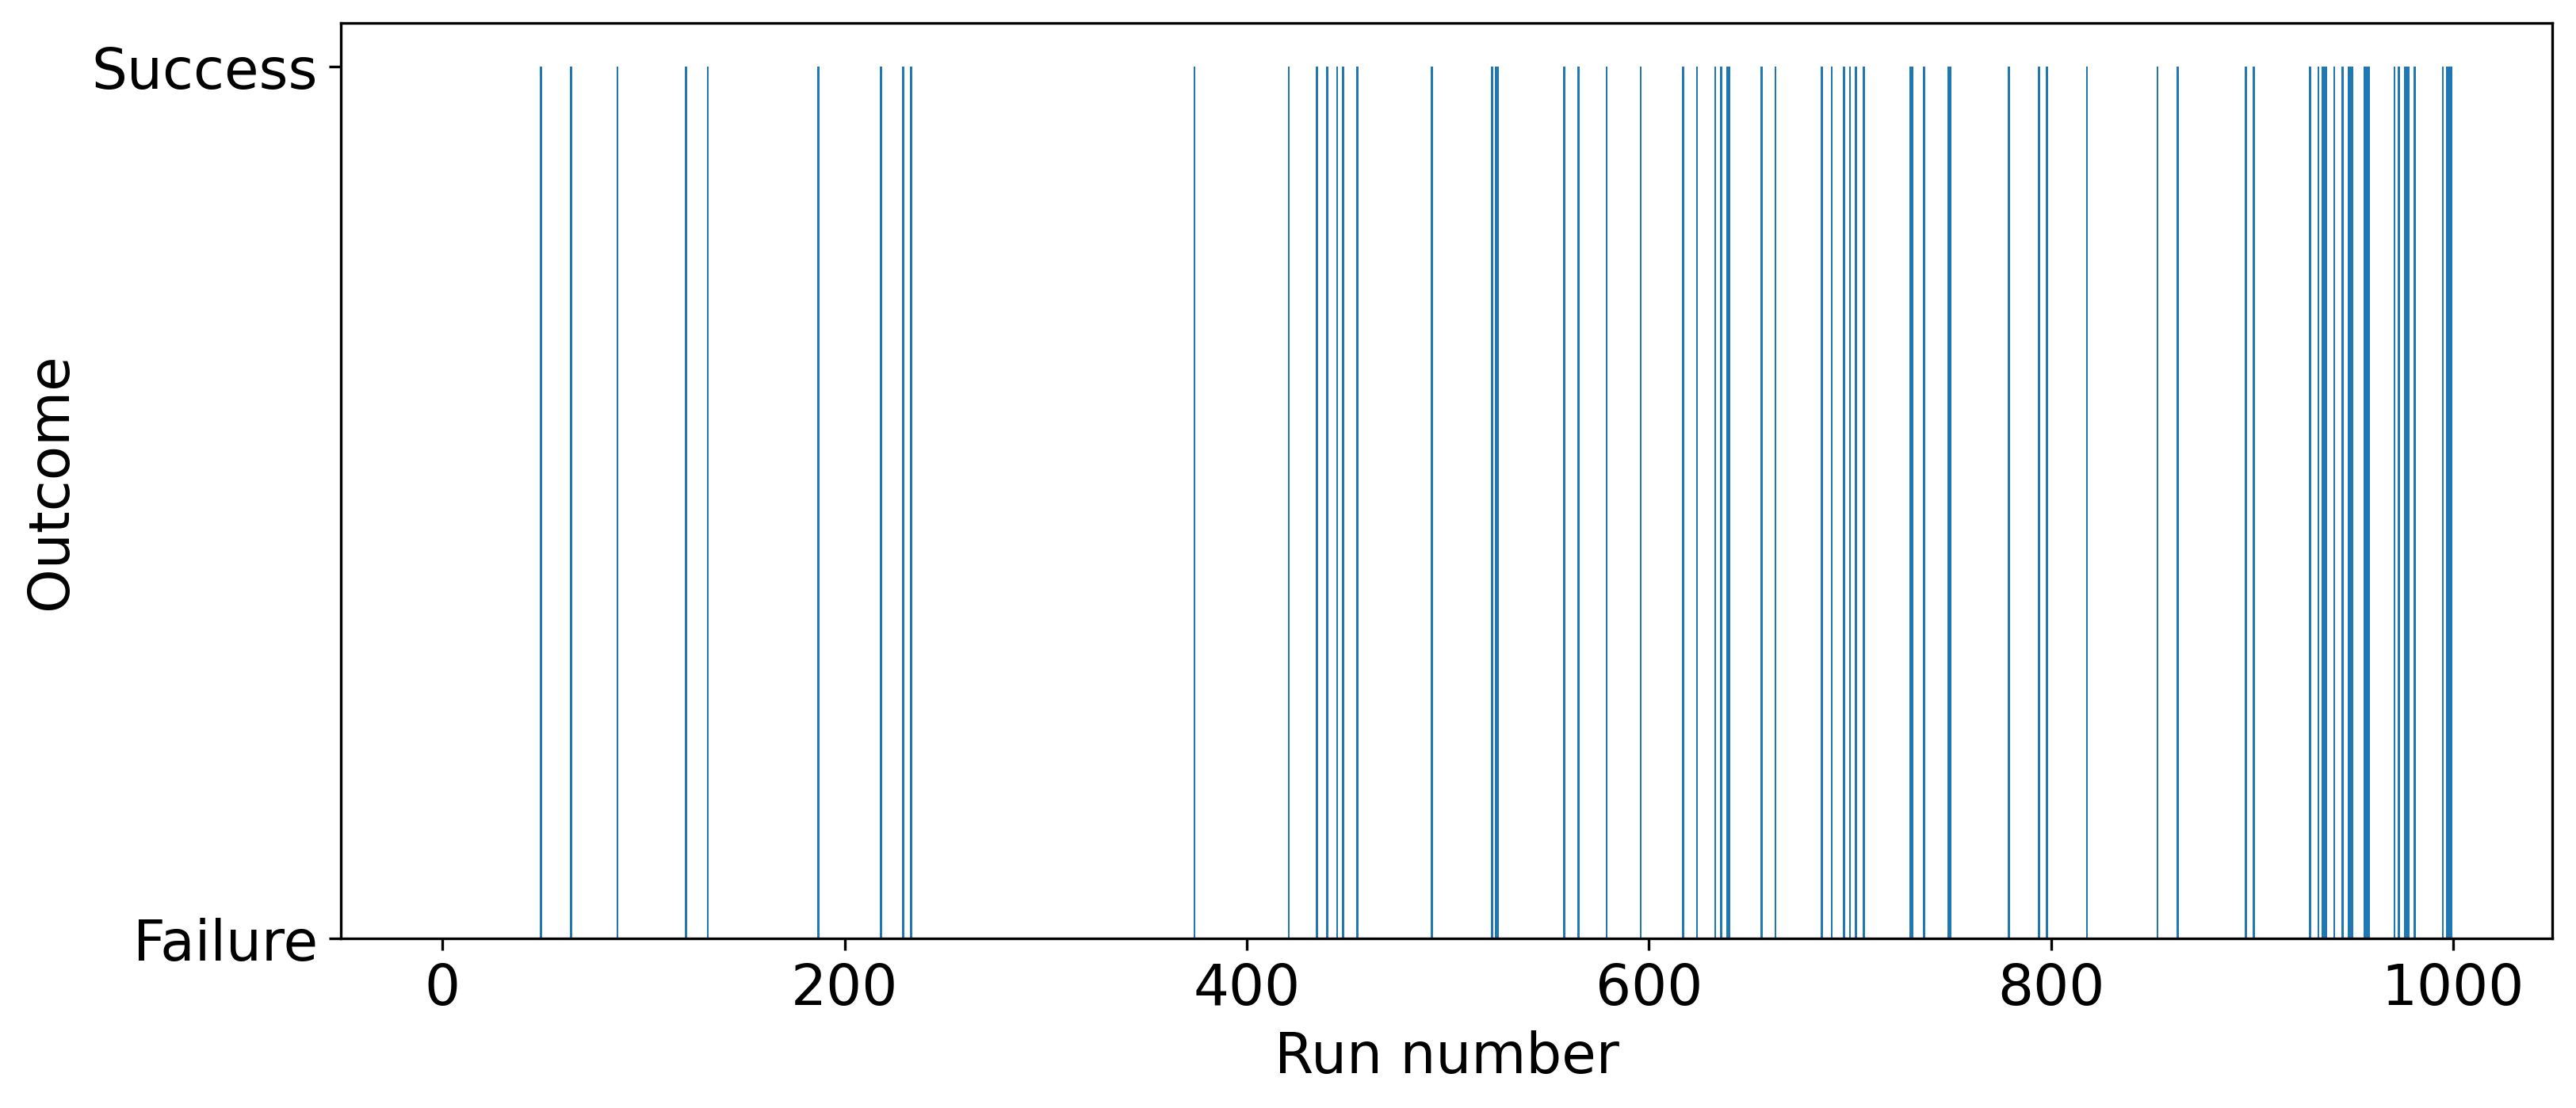

Success rate = 46.0%


In [15]:
# Inicializa el resbaladizo lago congelado
environment = gym.make("FrozenLake-v1", is_slippery=True)
environment.reset()

# Reinicializamos la Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hiperparámetros
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# Lista de resultados para trazar
outcomes = []

print('Q-table before training:')
print(qtable)

# Capacitación
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Por defecto, consideramos que nuestro resultado es un fracaso.
    outcomes.append("Failure")

    # Hasta que el agente se quede atrapado en un agujero o alcance la meta, sigue entrenándolo
    while not done:
        #Genera un número aleatorio entre 0 y 1
        rnd = np.random.random()

        # Si el número aleatorio < épsilon, realiza una acción aleatoria
        if rnd < epsilon:
          action = environment.action_space.sample()
        # De lo contrario, realice la acción con el valor más alto en el estado actual.
        else:
          action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Actualizar nuestro estado actual
        state = new_state

        # Si tenemos una recompensa, significa que nuestro resultado es un éxito.
        if reward:
          outcomes[-1] = "Success"

    # Actualizar épsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Resultados de la trama
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
plt.bar(range(len(outcomes)), outcomes, width=1.0)
plt.show()

episodes = 100
nb_success = 0

# Evaluación
for _ in range(100):
    state = environment.reset()
    done = False

    # Hasta que el agente se atasque o alcance la meta, sigue entrenándolo
    while not done:
        # Elija la acción con el valor más alto en el estado actual
        action = np.argmax(qtable[state])

        # Implemente esta acción y mueva el agente en la dirección deseada.
        new_state, reward, done, info = environment.step(action)

        # Actualizar nuestro estado actual
        state = new_state

        # Cuando recibimos una recompensa, significa que resolvimos el juego.
        nb_success += reward

# ¡Revisemos nuestra tasa de éxito!
print (f"Success rate = {nb_success/episodes*100}%")